# Inverse Methods
## Homework 4 Problem 3
### Problem Statement

Consider the example in class with the analysis of diamond ore. For this example, we have two diamonds encased in ore. The measurements of the individual diamond ores are $\mu_1 = 10$ g and $\mu_2 = 50$ g.

The experimental error in these measurements is a factor of two. We now consider an additional, more precise measurement, of the combined mass $\delta = \mu_1 + \mu_2 = 80$ g, with an uncertainty of 10%.

### Part (a)
Calculate and plot the shape of the prior joint pdf for $m_1 = \log_{10}(\mu_1/\mu_{ref})$ and $m_2 = \log_{10}(\mu_2/\mu_{ref} )$, their likelihood given the measurement of their combined weights, and their posterior conditional
pdf given this measurement.

### Solution

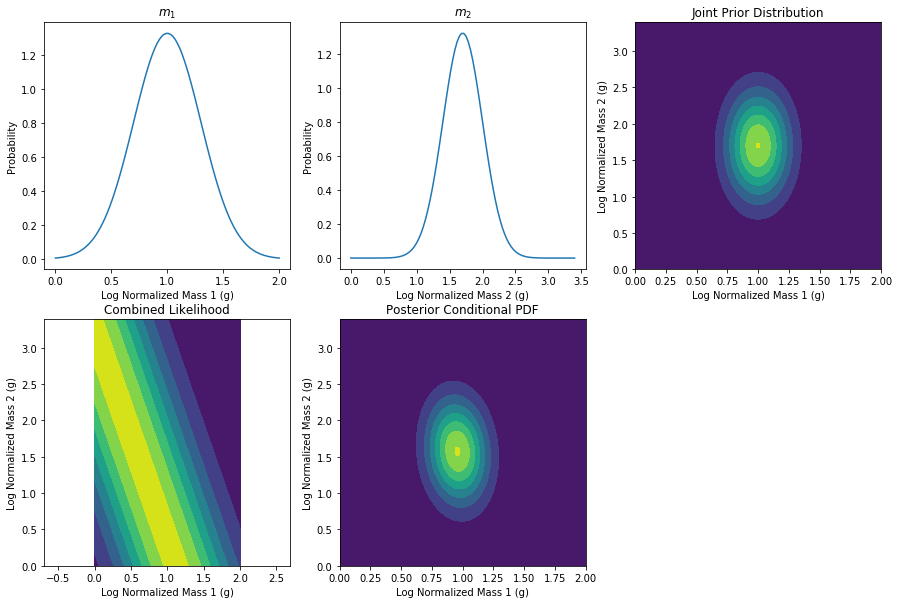

In [58]:
import numpy as np
import matplotlib.pyplot as plt

m_ref = 1 # Reference Mass
n = 100
N = np.arange(0,n)

# Mass 1
mu1 = 10 # Mass measurment
m1 = np.log10(mu1/m_ref) # Normalized log of mass
u1 = np.log10(2) # Uncertainty
x1 = np.linspace(0,2*m1,n) # Space for distribution in logspace
p1 = np.exp(-0.5*(x1-m1)**2/u1**2)/(u1*np.sqrt(2*np.pi)) # Probability density function

# Mass 2
mu2 = 50
m2 = np.log10(mu2/m_ref)
u2 = np.log10(2)
x2 = np.linspace(0,2*m2,n)
p2 = np.exp(-0.5*(x2-m2)**2/u2**2)/(u2*np.sqrt(2*np.pi))

# Joint Prior
[X1,X2] = np.meshgrid(x1,x2)
prior = np.outer(p1,p2)

# Plotting
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.plot(x1,p1);
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Probability')

plt.title('$m_1$')
plt.subplot(2,3,2)
plt.plot(x2, p2)
plt.xlabel('Log Normalized Mass 2 (g)')
plt.ylabel('Probability')

plt.title('$m_2$')
plt.subplot(2,3,3)
plt.contourf(X1,X2, prior)
plt.title('Joint Prior Distribution')
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Log Normalized Mass 2 (g)')
# plt.axis('equal')

# Combined Likelihood
delta = 80
dl = np.log10(delta/m_ref)
uc = delta*0.1
ucl = np.log10(uc)
g = np.add.outer(x1,x2)
f = np.exp(-0.5*(g-dl)**2/ucl**2)/(ucl*np.sqrt(2*np.pi))
plt.subplot(2,3,4)
plt.contourf(X1,X2,f)
plt.title('Combined Likelihood')
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Log Normalized Mass 2 (g)')
plt.axis('equal')

# Posterior Conditional PDF
post = f*prior
plt.subplot(2,3,5)
plt.contourf(X1,X2,post)
plt.title('Posterior Conditional PDF')
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Log Normalized Mass 2 (g)');
# plt.axis('equal')


### Explanation

The first two plots (top left and center) show the probability distributions for $\mu_1$ and $\mu_2$ given their respective individual mesurements. The third plot (top right) shows their joint probability density which is obtained by multiplying their individual densities. The fourth plot (bottom left) shows the combined likelihood given the combined weight measurement. And the final plot shows the posterior conditional PDF.

### Part (b) 

Plot the non-normalized pdfs $p(m_1|d)$ and $p(m_2|d)$.

### Solution

See the first two plots in the previous section

### Part (c)

What is the MAP estimate of the values of $\mu_1$ and $\mu_2$? How do these compare to the estimates of
the mean values of $\mu_1$ and $\mu_2$?

In [46]:
Mi1,Mi2 = np.unravel_index(np.argmax(post),post.shape)

MAP1 = 10**x1[Mi1]
MAP2 = 10**x2[Mi2]

print('MAP value for mu_1 = ', MAP1)
print('MAP value for mu_2 = ', MAP2)

MAP value for mu_1 =  8.497534359086444
MAP value for mu_2 =  41.035850454280094


### Explanation

First we find the indices of the maximum value in the Posterior Conditional PDF. Once we have those indicies, we can trace them to the their corresponding values on the x- and y-axes of the final plot in part (a). Then we have to take ten to the power of those values to get undo the log we originally did in part (a). This reveals MAP values of 8.50 and 41.0 for masses 1 and 2, respectively.

### Part(d) 

Which diamond’s mass has been more constrained by the experiment measuring their combined
mass?

### Solution

Looking at the bottom left plot in part (a), the contour lines are closer together in the directon of the horizontal axis than the vertical. This leads me to believe that the mass associated with the horizontal axis (mass 1) is more tightly constrained by the upadte than the second mass. This is counterintuitive, however, because it seems to me that with no other information, the greater of the masses should be more tightly constrained.

### Part (e) 

Consider an alternative hypothesis that $\mu_1 = 20$ g and $\mu_2 = 50$ g. How strong is the evidence
against this alternative hypothesis, based on the posterior odds of the MAP values to these values?

### Part (f)

Repeat the analysis from step (a), but solve the problem directly for the diamond ore masses, not
the log-masses. What is the MAP solution in this case? Can negative masses for the fist diamond
be ruled out?

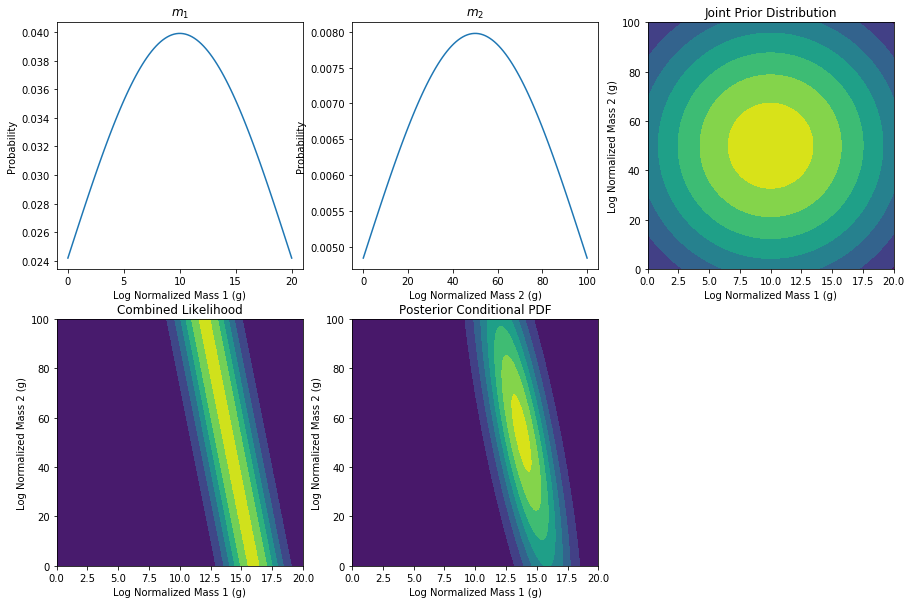

In [60]:
# Mass 1
# mu1 = 10 # Mass measurment
sig1 = mu1 # Uncertainty
xf1 = np.linspace(0,2*mu1,n) # Space for distribution
pf1 = np.exp(-0.5*(xf1-mu1)**2/sig1**2)/(sig1*np.sqrt(2*np.pi)) # Probability density function

# Mass 2
# mu2 = 50
sig2 = mu2
xf2 = np.linspace(0,2*mu2,n)
pf2 = np.exp(-0.5*(xf2-mu2)**2/sig2**2)/(sig2*np.sqrt(2*np.pi))

# Joint Prior
[XF1,XF2] = np.meshgrid(xf1,xf2)
priorf = np.outer(pf1,pf2)

# Plotting
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.plot(xf1,pf1);
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Probability')

plt.title('$m_1$')
plt.subplot(2,3,2)
plt.plot(xf2, pf2)
plt.xlabel('Log Normalized Mass 2 (g)')
plt.ylabel('Probability')

plt.title('$m_2$')
plt.subplot(2,3,3)
plt.contourf(XF1,XF2, priorf)
plt.title('Joint Prior Distribution')
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Log Normalized Mass 2 (g)')
# plt.axis('equal')

# Combined Likelihood
# delta = 80
# uc = delta*0.1
g = np.add.outer(xf1,xf2)
ff = np.exp(-0.5*(g-delta)**2/uc**2)/(uc*np.sqrt(2*np.pi))
plt.subplot(2,3,4)
plt.contourf(XF1,XF2,ff)
plt.title('Combined Likelihood')
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Log Normalized Mass 2 (g)')

# Posterior Conditional PDF
postf = ff*priorf
plt.subplot(2,3,5)
plt.contourf(XF1,XF2,postf)
plt.title('Posterior Conditional PDF')
plt.xlabel('Log Normalized Mass 1 (g)')
plt.ylabel('Log Normalized Mass 2 (g)');